In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [5]:
custom = pd.read_csv('../data/cs_mkt_dataset/cs_data.csv', low_memory = False)

### 'BUY_CNT' 전체 기간 합치기

In [ ]:
columns=['BUY_CNT_M']
select=[]
for col in columns:
    for i in range(1,5):
        for j in range(1,4):
            colum= col+str(i)+'_'+str(j)
            select.append(colum)
            
select

In [ ]:
custom[select]

In [ ]:
custom1= custom[select]
custom2= custom1.fillna(0)
sum_custom2= custom2.sum(axis=1)
custom1[columns[0][:-2]]= sum_custom2
custom1.drop(columns=select)

### 전체 기간별 합치기
columns = ['BUY_CNT_M','SEL_CNT_M','BUY_ITM_CNT_M','SEL_ITM_CNT_M','BUY_AMT_M','SEL_AMT_M',
          'STK_IN_M','STK_OUT_M','MNY_IN_M','MNY_OUT_M','CONN_DYS_M','MTS_DYS_M','HTS_DYS_M']

In [6]:
custom3= pd.DataFrame()
columns= ['BUY_CNT_M','SEL_CNT_M','BUY_ITM_CNT_M','SEL_ITM_CNT_M','BUY_AMT_M','SEL_AMT_M', 
          'STK_IN_M','STK_OUT_M','MNY_IN_M','MNY_OUT_M','CONN_DYS_M','MTS_DYS_M','HTS_DYS_M']
for col in columns:
    select=[]
    for i in range(1,5):
        for j in range(1,4):
            colum= col+str(i)+'_'+str(j)
            select.append(colum)
    
    custom1= custom[select]
    custom2= custom1.fillna(0)
    sum_custom2= custom2.sum(axis=1)
    custom[col[:-2]]= sum_custom2
    custom.drop(columns=select, inplace=True)
    print(len(custom.columns))

509
498
487
476
465
454
443
432
421
410
399
388
377


In [4]:
custom.columns.to_list()

['AGE_TCD',
 'MT_EP_EXIST_YN',
 'LST_BEST_EA',
 'LST_BEST_YM',
 'DMST_FST_BUY_YM',
 'DMETF_FST_BUY_YM',
 'OVST_FST_BUY_YM',
 'OVETF_FST_BUY_YM',
 'DMST_FIN_BUY_YM',
 'DMETF_FIN_BUY_YM',
 'OVST_FIN_BUY_YM',
 'OVETF_FIN_BUY_YM',
 'DMST_TR_MONTHS_CNT',
 'DMETF_TR_MONTHS_CNT',
 'OVST_TR_MONTHS_CNT',
 'OVETF_TR_MONTHS_CNT',
 'APY_ITM_CNT',
 'APY_FIN_YM',
 'DAY_TR_RATIO',
 'SWING_TR_RATIO',
 'MONTHS_TR_RATIO',
 'MID_TR_RATIO',
 'HLD_TR_RATIO',
 'YEARS_TR_RATIO',
 'CASH_AST_M1',
 'DMST_AST_EVAL_M1',
 'OVST_AST_EVAL_M1',
 'DMST_AST_PCHS_M1',
 'OVST_AST_PCHS_M1',
 'DMST_ITM_CNT_M1',
 'OVST_ITM_CNT_M1',
 'DMST_AST1_ITM_M1',
 'DMST_AST2_ITM_M1',
 'DMST_AST3_ITM_M1',
 'DMST_AST1_MKT_M1',
 'DMST_AST2_MKT_M1',
 'DMST_AST3_MKT_M1',
 'DMST_AST1_PCHS_M1',
 'DMST_AST2_PCHS_M1',
 'DMST_AST3_PCHS_M1',
 'DMST_AST1_EVAL_M1',
 'DMST_AST2_EVAL_M1',
 'DMST_AST3_EVAL_M1',
 'OVST_AST1_ITM_M1',
 'OVST_AST2_ITM_M1',
 'OVST_AST3_ITM_M1',
 'OVST_AST1_MKT_M1',
 'OVST_AST2_MKT_M1',
 'OVST_AST3_MKT_M1',
 'OVST_AST1_PCH

### 최초 매수연월에 따른 시각화
- 매수연월에 따른 특징 존재?
    - 코로나 초기?에 시작한 사람들은 최대
    - 2020, 2021, 2022로 분류해보자!
- 일반주식과 ETF를 같이시작하는 비율?

In [8]:
print(custom['DMST_FST_BUY_YM'].isna().mean())
print(custom['DMETF_FST_BUY_YM'].isna().mean())
print(custom['OVST_FST_BUY_YM'].isna().mean())
print(custom['OVETF_FST_BUY_YM'].isna().mean())
# 국내주식 97% 국내ETF 33% 해외주식 23% 해외ETF 14%
# 기간외도 고려해야함

0.029029961110806815
0.672855243567847
0.7745198603773397
0.8634396769358702


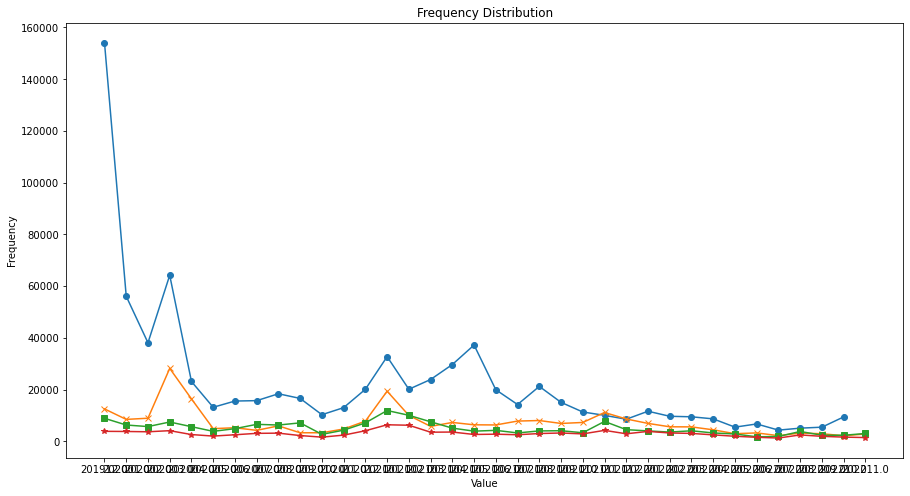

In [9]:
import matplotlib.pyplot as plt
dmst= custom['DMST_FST_BUY_YM'].value_counts().sort_index()
dmetf= custom['DMETF_FST_BUY_YM'].value_counts().sort_index()
ovst= custom['OVST_FST_BUY_YM'].value_counts().sort_index()
ovetf= custom['OVETF_FST_BUY_YM'].value_counts().sort_index()

#선 그래프 그리기
plt.figure(figsize=(15,8))
plt.plot(dmst.index.astype(str), dmst.values, marker='o')
plt.plot(dmetf.index.astype(str), dmetf.values, marker='x')
plt.plot(ovst.index.astype(str), ovst.values, marker='s')
plt.plot(ovetf.index.astype(str), ovetf.values, marker='*')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')
plt.show()

# 2020.3, 2021.1, 2021.5에 증가

### 마켓 정보
코스피, 코스닥, ...

In [10]:
custom

,AGE_TCD,MT_EP_EXIST_YN,LST_BEST_EA,LST_BEST_YM,DMST_FST_BUY_YM,DMETF_FST_BUY_YM,OVST_FST_BUY_YM,OVETF_FST_BUY_YM,DMST_FIN_BUY_YM,DMETF_FIN_BUY_YM,...,SEL_ITM_CNT,BUY_AMT,SEL_AMT,STK_IN,STK_OUT,MNY_IN,MNY_OUT,CONN_DYS,MTS_DYS,HTS_DYS
0,50,Y,3.000000e+08,202206,202007.0,202111.0,NaN,NaN,202205.0,202208.0,...,2.0,3.000000e+06,8.800000e+06,0.0,0.0,5000000.0,5000000.0,120.0,120.0,0.0
1,60,N,2.200000e+08,201711,201912.0,NaN,NaN,NaN,202210.0,NaN,...,9.0,2.200000e+06,3.780000e+07,0.0,0.0,27000000.0,55000000.0,85.0,84.0,8.0
2,40,N,4.400000e+07,202206,202105.0,NaN,202111.0,202111.0,202211.0,NaN,...,232.0,2.523130e+08,2.523000e+08,49000.0,233000.0,49000.0,233000.0,117.0,117.0,0.0
3,40,Y,2.100000e+08,202201,201912.0,202003.0,202009.0,202101.0,202204.0,202008.0,...,22.0,4.392000e+09,4.822000e+09,0.0,0.0,7600000.0,8500000.0,10.0,4.0,7.0
4,50,N,5.100000e+07,202209,202207.0,NaN,NaN,NaN,202209.0,NaN,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,22.0,22.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803303,60,N,3.400000e+07,202209,202001.0,NaN,NaN,NaN,202211.0,NaN,...,0.0,5.700000e+06,0.000000e+00,0.0,0.0,6790000.0,200000.0,80.0,13.0,71.0
803304,50,N,1.600000e+08,202204,201912.0,NaN,NaN,NaN,202211.0,NaN,...,24.0,1.116000e+08,1.127920e+08,0.0,0.0,17400000.0,14650000.0,95.0,95.0,0.0
803305,40,Y,1.100000e+09,202104,201912.0,NaN,NaN,NaN,202211.0,NaN,...,18.0,2.423500e+08,1.448950e+08,0.0,0.0,243330000.0,197070000.0,94.0,94.0,0.0
803306,60,N,1.700000e+08,202108,201912.0,NaN,NaN,NaN,202207.0,NaN,...,0.0,3.600000e+06,0.000000e+00,0.0,0.0,4550000.0,1270000.0,11.0,11.0,0.0


In [12]:
for i in range(1,5):
    print(custom[f'DMST_AST1_MKT_M{i}'].value_counts())

코스피    553364
코스닥    198165
코넥스      1061
*         524
Name: DMST_AST1_MKT_M1, dtype: int64
코스피    543137
코스닥    202883
코넥스      1054
*         510
Name: DMST_AST1_MKT_M2, dtype: int64
코스피    536309
코스닥    207444
코넥스      1105
*         555
Name: DMST_AST1_MKT_M3, dtype: int64
코스피    527220
코스닥    211826
코넥스      1086
*         560
Name: DMST_AST1_MKT_M4, dtype: int64


In [ ]:
for i in range(1,5):
    print(custom[f'OVST_AST1_MKT_M{i}'].value_counts())

In [15]:
custom.count().to_list().index(min(custom.count().to_list()))

195

In [19]:
custom.columns[195]

'SEL3_ITM_M1_3'

In [27]:
custom.iloc[:,195].count()

69640

### 모든 기간의 1위 종목 번호를 리스트로 묶어서 하나의 컬럼으로 저장
- 'BUY1_ITM'
    - ['BUY1_ITM_M1_1', 'BUY1_ITM_M1_2', 'BUY1_ITM_M1_3', 'BUY1_ITM_M2_1','BUY1_ITM_M2_2', 'BUY1_ITM_M2_3', 'BUY1_ITM_M3_1', 'BUY1_ITM_M3_2','BUY1_ITM_M3_3', 'BUY1_ITM_M4_1', 'BUY1_ITM_M4_2', 'BUY1_ITM_M4_3']
- 'BUY2_ ITM'

In [7]:
custom2= custom

In [41]:
custom2.columns

Index(['AGE_TCD', 'MT_EP_EXIST_YN', 'LST_BEST_EA', 'LST_BEST_YM',
       'DMST_FST_BUY_YM', 'DMETF_FST_BUY_YM', 'OVST_FST_BUY_YM',
       'OVETF_FST_BUY_YM', 'DMST_FIN_BUY_YM', 'DMETF_FIN_BUY_YM',
       ...
       'SEL_ITM_CNT', 'BUY_AMT', 'SEL_AMT', 'STK_IN', 'STK_OUT', 'MNY_IN',
       'MNY_OUT', 'CONN_DYS', 'MTS_DYS', 'HTS_DYS'],
      dtype='object', length=377)

In [8]:
pattern= r'BUY1_ITM+'
filtered_columns= custom2.filter(regex=pattern)

filtered_columns

,BUY1_ITM_M1_1,BUY1_ITM_M1_2,BUY1_ITM_M1_3,BUY1_ITM_M2_1,BUY1_ITM_M2_2,BUY1_ITM_M2_3,BUY1_ITM_M3_1,BUY1_ITM_M3_2,BUY1_ITM_M3_3,BUY1_ITM_M4_1,BUY1_ITM_M4_2,BUY1_ITM_M4_3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,453540
1,NaN,NaN,NaN,NaN,NaN,NaN,302440,NaN,NaN,NaN,NaN,NaN
2,170030,207760,419120,054920,008700,108860,019680,NaN,019680,NaN,NaN,049080
3,TQQQ,SQQQ,SQQQ,SQQQ,SQQQ,TQQQ,TQQQ,NaN,TQQQ,SQQQ,TQQQ,SQQQ
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
803303,NaN,NaN,NaN,NaN,NaN,NaN,010140,NaN,NaN,NaN,NaN,NaN
803304,NaN,NaN,NaN,NaN,042370,NaN,160550,118990,071670,310200,NaN,049480
803305,101730,258830,258830,067000,099320,225570,225570,225570,123420,225570,023770,225570
803306,NaN,NaN,NaN,NaN,015760,NaN,NaN,NaN,NaN,015760,NaN,NaN


In [54]:
BUY1= filtered_columns.copy()

In [56]:
BUY1.dropna()
# 매주 거래한 사람 65739명


,BUY1_ITM_M1_1,BUY1_ITM_M1_2,BUY1_ITM_M1_3,BUY1_ITM_M2_1,BUY1_ITM_M2_2,BUY1_ITM_M2_3,BUY1_ITM_M3_1,BUY1_ITM_M3_2,BUY1_ITM_M3_3,BUY1_ITM_M4_1,BUY1_ITM_M4_2,BUY1_ITM_M4_3,BUY1_ITM
14,005389,005389,011785,267250,000815,000815,000815,121600,247540,247540,247540,003670,"005389,005389,011785,267250,000815,000815,0008..."
23,005090,337930,005090,213420,213420,019590,019590,050890,019590,252670,002900,252670,"005090,337930,005090,213420,213420,019590,0195..."
29,002380,047810,036460,006400,034020,003670,011070,TSLA,373220,373220,066970,066970,"002380,047810,036460,006400,034020,003670,0110..."
44,086520,109610,249420,089890,322000,205100,259960,298050,001430,059090,003670,383310,"086520,109610,249420,089890,322000,205100,2599..."
46,058630,010140,036420,160550,352820,272290,000990,417840,004430,417840,009150,101160,"058630,010140,036420,160550,352820,272290,0009..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
803245,TQQQ,TQQQ,QLD,TQQQ,011200,TSLA,TQQQ,SOXL,007690,SOXL,SOXL,SOXL,"TQQQ,TQQQ,QLD,TQQQ,011200,TSLA,TQQQ,SOXL,00769..."
803248,419530,249420,249420,162300,900310,277810,006220,108860,108860,009520,277810,131400,"419530,249420,249420,162300,900310,277810,0062..."
803265,AMZN,TSLA,TSLA,MSFT,INTC,PYPL,INTC,PLTR,MSFT,INTC,CPNG,000660,"AMZN,TSLA,TSLA,MSFT,INTC,PYPL,INTC,PLTR,MSFT,I..."
803273,051900,233740,TSLA,373220,BOIL,FNGD,SOXL,063440,328130,SOXL,TMF,189300,"051900,233740,TSLA,373220,BOIL,FNGD,SOXL,06344..."


In [9]:
filtered_columns.columns

Index(['BUY1_ITM_M1_1', 'BUY1_ITM_M1_2', 'BUY1_ITM_M1_3', 'BUY1_ITM_M2_1',
       'BUY1_ITM_M2_2', 'BUY1_ITM_M2_3', 'BUY1_ITM_M3_1', 'BUY1_ITM_M3_2',
       'BUY1_ITM_M3_3', 'BUY1_ITM_M4_1', 'BUY1_ITM_M4_2', 'BUY1_ITM_M4_3'],
      dtype='object')

In [10]:
def combine_info(row):
#     return f'{row['']}'
    return f"{row['BUY1_ITM_M1_1']},{row['BUY1_ITM_M1_2']},{row['BUY1_ITM_M1_3']},\
{row['BUY1_ITM_M2_1']},{row['BUY1_ITM_M2_2']},{row['BUY1_ITM_M2_3']},\
{row['BUY1_ITM_M3_1']},{row['BUY1_ITM_M3_2']},{row['BUY1_ITM_M3_3']},\
{row['BUY1_ITM_M4_1']},{row['BUY1_ITM_M4_2']},{row['BUY1_ITM_M4_3']}"


In [11]:
filtered_columns['BUY1_ITM']= filtered_columns.apply(combine_info, axis=1)

print(filtered_columns)

       BUY1_ITM_M1_1 BUY1_ITM_M1_2 BUY1_ITM_M1_3 BUY1_ITM_M2_1 BUY1_ITM_M2_2  \
0                NaN           NaN           NaN           NaN           NaN   
1                NaN           NaN           NaN           NaN           NaN   
2             170030        207760        419120        054920        008700   
3               TQQQ          SQQQ          SQQQ          SQQQ          SQQQ   
4                NaN           NaN           NaN           NaN           NaN   
...              ...           ...           ...           ...           ...   
803303           NaN           NaN           NaN           NaN           NaN   
803304           NaN           NaN           NaN           NaN        042370   
803305        101730        258830        258830        067000        099320   
803306           NaN           NaN           NaN           NaN        015760   
803307        099430           NaN        099430           NaN           NaN   

       BUY1_ITM_M2_3 BUY1_ITM_M3_1 BUY1

<ipython-input-11-7f68c9d7e6bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_columns['BUY1_ITM']= filtered_columns.apply(combine_info, axis=1)


In [53]:
filtered_columns['BUY1_ITM'][2].split(',')

['170030',
 '207760',
 '419120',
 '054920',
 '008700',
 '108860',
 '019680',
 'nan',
 '019680',
 'nan',
 'nan',
 '049080']

In [61]:
def split_text(text):
    return text.split(',')
df_applied= filtered_columns['BUY1_ITM'].apply(split_text, )
df_applied

0         [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
1         [nan, nan, nan, nan, nan, nan, 302440, nan, na...
2         [170030, 207760, 419120, 054920, 008700, 10886...
3         [TQQQ, SQQQ, SQQQ, SQQQ, SQQQ, TQQQ, TQQQ, nan...
4         [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
                                ...                        
803303    [nan, nan, nan, nan, nan, nan, 010140, nan, na...
803304    [nan, nan, nan, nan, 042370, nan, 160550, 1189...
803305    [101730, 258830, 258830, 067000, 099320, 22557...
803306    [nan, nan, nan, nan, 015760, nan, nan, nan, na...
803307    [099430, nan, 099430, nan, nan, 099430, 099430...
Name: BUY1_ITM, Length: 803308, dtype: object

In [72]:
for i in range(len(df_applied)):
    df_applied[i]= [item for item in df_applied[i] if item !='nan']
    
df_applied


0                                                  [453540]
1                                                  [302440]
2         [170030, 207760, 419120, 054920, 008700, 10886...
3         [TQQQ, SQQQ, SQQQ, SQQQ, SQQQ, TQQQ, TQQQ, TQQ...
4                                                        []
                                ...                        
803303                                             [010140]
803304     [042370, 160550, 118990, 071670, 310200, 049480]
803305    [101730, 258830, 258830, 067000, 099320, 22557...
803306                                     [015760, 015760]
803307     [099430, 099430, 099430, 099430, 085370, 099430]
Name: BUY1_ITM, Length: 803308, dtype: object

In [74]:
df_applied[2]

['170030',
 '207760',
 '419120',
 '054920',
 '008700',
 '108860',
 '019680',
 '019680',
 '049080']

In [62]:
df_applied

0         [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
1         [nan, nan, nan, nan, nan, nan, 302440, nan, na...
2         [170030, 207760, 419120, 054920, 008700, 10886...
3         [TQQQ, SQQQ, SQQQ, SQQQ, SQQQ, TQQQ, TQQQ, nan...
4         [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
                                ...                        
803303    [nan, nan, nan, nan, nan, nan, 010140, nan, na...
803304    [nan, nan, nan, nan, 042370, nan, 160550, 1189...
803305    [101730, 258830, 258830, 067000, 099320, 22557...
803306    [nan, nan, nan, nan, 015760, nan, nan, nan, na...
803307    [099430, nan, 099430, nan, nan, 099430, 099430...
Name: BUY1_ITM, Length: 803308, dtype: object

In [86]:
#### BUY2_ITM

pattern= r'BUY2_ITM+'
filtered_columns2= custom2.filter(regex=pattern)
filtered_columns2.columns

Index(['BUY2_ITM_M1_1', 'BUY2_ITM_M1_2', 'BUY2_ITM_M1_3', 'BUY2_ITM_M2_1',
       'BUY2_ITM_M2_2', 'BUY2_ITM_M2_3', 'BUY2_ITM_M3_1', 'BUY2_ITM_M3_2',
       'BUY2_ITM_M3_3', 'BUY2_ITM_M4_1', 'BUY2_ITM_M4_2', 'BUY2_ITM_M4_3'],
      dtype='object')

In [87]:
def combine_info(row):
    return f"{row['BUY2_ITM_M1_1']},{row['BUY2_ITM_M1_2']},{row['BUY2_ITM_M1_3']},\
{row['BUY2_ITM_M2_1']},{row['BUY2_ITM_M2_2']},{row['BUY2_ITM_M2_3']},\
{row['BUY2_ITM_M3_1']},{row['BUY2_ITM_M3_2']},{row['BUY2_ITM_M3_3']},\
{row['BUY2_ITM_M4_1']},{row['BUY2_ITM_M4_2']},{row['BUY2_ITM_M4_3']}"


filtered_columns2['BUY2_ITM']= filtered_columns2.apply(combine_info, axis=1)

print(filtered_columns2)

def split_text(text):
    return text.split(',')
df_applied2= filtered_columns2['BUY2_ITM'].apply(split_text)
df_applied2

<ipython-input-87-350d14e184ea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_columns2['BUY2_ITM']= filtered_columns2.apply(combine_info, axis=1)


       BUY2_ITM_M1_1 BUY2_ITM_M1_2 BUY2_ITM_M1_3 BUY2_ITM_M2_1 BUY2_ITM_M2_2  \
0                NaN           NaN           NaN           NaN           NaN   
1                NaN           NaN           NaN           NaN           NaN   
2             196700        120240        365900        253840        900310   
3               SQQQ          TQQQ          TQQQ          TQQQ          TQQQ   
4                NaN           NaN           NaN           NaN           NaN   
...              ...           ...           ...           ...           ...   
803303           NaN           NaN           NaN           NaN           NaN   
803304           NaN           NaN           NaN           NaN           NaN   
803305           NaN           NaN           NaN        058630           NaN   
803306           NaN           NaN           NaN           NaN           NaN   
803307           NaN           NaN           NaN           NaN           NaN   

       BUY2_ITM_M2_3 BUY2_ITM_M3_1 BUY2

0         [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
1         [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
2         [196700, 120240, 365900, 253840, 900310, 05811...
3         [SQQQ, TQQQ, TQQQ, TQQQ, TQQQ, SQQQ, SQQQ, nan...
4         [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
                                ...                        
803303    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
803304    [nan, nan, nan, nan, nan, nan, 241520, 204620,...
803305    [nan, nan, nan, 058630, nan, nan, 114630, nan,...
803306    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
803307    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
Name: BUY2_ITM, Length: 803308, dtype: object

In [89]:
#### BUY3_ITM

pattern= r'BUY3_ITM+'
filtered_columns3= custom2.filter(regex=pattern)
filtered_columns3.columns

Index(['BUY3_ITM_M1_1', 'BUY3_ITM_M1_2', 'BUY3_ITM_M1_3', 'BUY3_ITM_M2_1',
       'BUY3_ITM_M2_2', 'BUY3_ITM_M2_3', 'BUY3_ITM_M3_1', 'BUY3_ITM_M3_2',
       'BUY3_ITM_M3_3', 'BUY3_ITM_M4_1', 'BUY3_ITM_M4_2', 'BUY3_ITM_M4_3'],
      dtype='object')

In [90]:
def combine_info(row):
    return f"{row['BUY3_ITM_M1_1']},{row['BUY3_ITM_M1_2']},{row['BUY3_ITM_M1_3']},\
{row['BUY3_ITM_M2_1']},{row['BUY3_ITM_M2_2']},{row['BUY3_ITM_M2_3']},\
{row['BUY3_ITM_M3_1']},{row['BUY3_ITM_M3_2']},{row['BUY3_ITM_M3_3']},\
{row['BUY3_ITM_M4_1']},{row['BUY3_ITM_M4_2']},{row['BUY3_ITM_M4_3']}"


filtered_columns3['BUY3_ITM']= filtered_columns3.apply(combine_info, axis=1)

print(filtered_columns3)

def split_text(text):
    return text.split(',')
df_applied3= filtered_columns3['BUY3_ITM'].apply(split_text)
df_applied3

<ipython-input-90-d6f590d0ed6b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_columns3['BUY3_ITM']= filtered_columns3.apply(combine_info, axis=1)


       BUY3_ITM_M1_1 BUY3_ITM_M1_2 BUY3_ITM_M1_3 BUY3_ITM_M2_1 BUY3_ITM_M2_2  \
0                NaN           NaN           NaN           NaN           NaN   
1                NaN           NaN           NaN           NaN           NaN   
2             419530        014990        021040        142760        006220   
3               TSLA           NaN           NaN           NaN           NaN   
4                NaN           NaN           NaN           NaN           NaN   
...              ...           ...           ...           ...           ...   
803303           NaN           NaN           NaN           NaN           NaN   
803304           NaN           NaN           NaN           NaN           NaN   
803305           NaN           NaN           NaN           NaN           NaN   
803306           NaN           NaN           NaN           NaN           NaN   
803307           NaN           NaN           NaN           NaN           NaN   

       BUY3_ITM_M2_3 BUY3_ITM_M3_1 BUY3

0         [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
1         [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
2         [419530, 014990, 021040, 142760, 006220, 21750...
3         [TSLA, nan, nan, nan, nan, nan, nan, nan, nan,...
4         [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
                                ...                        
803303    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
803304    [nan, nan, nan, nan, nan, nan, 207760, 160550,...
803305    [nan, nan, nan, nan, nan, nan, 194480, nan, na...
803306    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
803307    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
Name: BUY3_ITM, Length: 803308, dtype: object

In [107]:
custom2['BUY1_ITM']= df_applied
custom2['BUY2_ITM']= df_applied2
custom2['BUY3_ITM']= df_applied3

In [105]:
custom2.drop(columns=filtered_columns, inplace=True)
custom2.drop(columns=filtered_columns2, inplace=True)
custom2.drop(columns=filtered_columns3, inplace=True)
len(custom2.columns)

342

In [108]:
custom2.columns.to_list()

['AGE_TCD',
 'MT_EP_EXIST_YN',
 'LST_BEST_EA',
 'LST_BEST_YM',
 'DMST_FST_BUY_YM',
 'DMETF_FST_BUY_YM',
 'OVST_FST_BUY_YM',
 'OVETF_FST_BUY_YM',
 'DMST_FIN_BUY_YM',
 'DMETF_FIN_BUY_YM',
 'OVST_FIN_BUY_YM',
 'OVETF_FIN_BUY_YM',
 'DMST_TR_MONTHS_CNT',
 'DMETF_TR_MONTHS_CNT',
 'OVST_TR_MONTHS_CNT',
 'OVETF_TR_MONTHS_CNT',
 'APY_ITM_CNT',
 'APY_FIN_YM',
 'DAY_TR_RATIO',
 'SWING_TR_RATIO',
 'MONTHS_TR_RATIO',
 'MID_TR_RATIO',
 'HLD_TR_RATIO',
 'YEARS_TR_RATIO',
 'CASH_AST_M1',
 'DMST_AST_EVAL_M1',
 'OVST_AST_EVAL_M1',
 'DMST_AST_PCHS_M1',
 'OVST_AST_PCHS_M1',
 'DMST_ITM_CNT_M1',
 'OVST_ITM_CNT_M1',
 'DMST_AST1_ITM_M1',
 'DMST_AST2_ITM_M1',
 'DMST_AST3_ITM_M1',
 'DMST_AST1_MKT_M1',
 'DMST_AST2_MKT_M1',
 'DMST_AST3_MKT_M1',
 'DMST_AST1_PCHS_M1',
 'DMST_AST2_PCHS_M1',
 'DMST_AST3_PCHS_M1',
 'DMST_AST1_EVAL_M1',
 'DMST_AST2_EVAL_M1',
 'DMST_AST3_EVAL_M1',
 'OVST_AST1_ITM_M1',
 'OVST_AST2_ITM_M1',
 'OVST_AST3_ITM_M1',
 'OVST_AST1_MKT_M1',
 'OVST_AST2_MKT_M1',
 'OVST_AST3_MKT_M1',
 'OVST_AST1_PCH

In [112]:
custom2.loc[:,['BUY2_ITM','BUY1_ITM','BUY3_ITM']]

## nan을 np.nan으로 처리

,BUY2_ITM,BUY1_ITM,BUY3_ITM
0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, 302440, nan, na...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
2,"[196700, 120240, 365900, 253840, 900310, 05811...","[170030, 207760, 419120, 054920, 008700, 10886...","[419530, 014990, 021040, 142760, 006220, 21750..."
3,"[SQQQ, TQQQ, TQQQ, TQQQ, TQQQ, SQQQ, SQQQ, nan...","[TQQQ, SQQQ, SQQQ, SQQQ, SQQQ, TQQQ, TQQQ, nan...","[TSLA, nan, nan, nan, nan, nan, nan, nan, nan,..."
4,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
...,...,...,...
803303,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, 010140, nan, na...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
803304,"[nan, nan, nan, nan, nan, nan, 241520, 204620,...","[nan, nan, nan, nan, 042370, nan, 160550, 1189...","[nan, nan, nan, nan, nan, nan, 207760, 160550,..."
803305,"[nan, nan, nan, 058630, nan, nan, 114630, nan,...","[101730, 258830, 258830, 067000, 099320, 22557...","[nan, nan, nan, nan, nan, nan, 194480, nan, na..."
803306,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, 015760, nan, nan, nan, na...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."


### SEL

In [117]:
#### SEL1_ITM
pattern= r'SEL1_ITM+'
filtered_columns1= custom2.filter(regex=pattern)

def combine_info(row):
    return f"{row['SEL1_ITM_M1_1']},{row['SEL1_ITM_M1_2']},{row['SEL1_ITM_M1_3']},\
{row['SEL1_ITM_M2_1']},{row['SEL1_ITM_M2_2']},{row['SEL1_ITM_M2_3']},\
{row['SEL1_ITM_M3_1']},{row['SEL1_ITM_M3_2']},{row['SEL1_ITM_M3_3']},\
{row['SEL1_ITM_M4_1']},{row['SEL1_ITM_M4_2']},{row['SEL1_ITM_M4_3']}"

filtered_columns1['SEL1_ITM']= filtered_columns1.apply(combine_info, axis=1)

def split_text(text):
    return text.split(',')

custom2['SEL1_ITM']= filtered_columns1['SEL1_ITM'].apply(split_text)

<ipython-input-117-f3b457eb5928>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_columns1['SEL1_ITM']= filtered_columns1.apply(combine_info, axis=1)


In [115]:
#### SEL2_ITM
pattern= r'SEL2_ITM+'
filtered_columns2= custom2.filter(regex=pattern)

def combine_info(row):
    return f"{row['SEL2_ITM_M1_1']},{row['SEL2_ITM_M1_2']},{row['SEL2_ITM_M1_3']},\
{row['SEL2_ITM_M2_1']},{row['SEL2_ITM_M2_2']},{row['SEL2_ITM_M2_3']},\
{row['SEL2_ITM_M3_1']},{row['SEL2_ITM_M3_2']},{row['SEL2_ITM_M3_3']},\
{row['SEL2_ITM_M4_1']},{row['SEL2_ITM_M4_2']},{row['SEL2_ITM_M4_3']}"

filtered_columns2['SEL2_ITM']= filtered_columns2.apply(combine_info, axis=1)

def split_text(text):
    return text.split(',')

custom2['SEL2_ITM']= filtered_columns2['SEL2_ITM'].apply(split_text)

<ipython-input-115-7967c5bbc33d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_columns2['SEL2_ITM']= filtered_columns2.apply(combine_info, axis=1)


In [116]:
def type_check(row):
    if np.isnan(row['OVETF_TR_MONTHS_CNT']) :
        if np.isnan(row['OVST_TR_MONTHS_CNT']):
            if np.isnan(row['DMETF_TR_MONTHS_CNT']):
                if np.isnan(row['DMST_TR_MONTHS_CNT']):
                    return 5
                else: return 1 # 국내주식함
            else: return 2 # 국내etf함
        else: return 3 # 해외주식함
    else: return 4 # 해외etf함
        
# row['OVETF_TR_MONTHS_CNT'].info()

custom['TYPE']= custom.apply(type_check, axis=1)

custom['TYPE'].value_counts()
# etf하면 다 해외주식하나?

custom[custom['TYPE']==1]['DMETF_TR_MONTHS_CNT'].count()

print(custom[custom['TYPE']==4]['DMST_TR_MONTHS_CNT'].count())
print(custom[custom['TYPE']==4]['DMETF_TR_MONTHS_CNT'].count())
print(custom[custom['TYPE']==4]['OVST_TR_MONTHS_CNT'].count())
print(custom[custom['TYPE']==4]['OVETF_TR_MONTHS_CNT'].count())


print(custom[custom['TYPE']==3]['DMST_TR_MONTHS_CNT'].count())
print(custom[custom['TYPE']==3]['DMETF_TR_MONTHS_CNT'].count())
print(custom[custom['TYPE']==3]['OVST_TR_MONTHS_CNT'].count())
print(custom[custom['TYPE']==3]['OVETF_TR_MONTHS_CNT'].count())

print(custom[custom['TYPE']==2]['DMST_TR_MONTHS_CNT'].count())
print(custom[custom['TYPE']==2]['DMETF_TR_MONTHS_CNT'].count())
print(custom[custom['TYPE']==2]['OVST_TR_MONTHS_CNT'].count())
print(custom[custom['TYPE']==2]['OVETF_TR_MONTHS_CNT'].count())

print(custom[custom['TYPE']==1]['DMST_TR_MONTHS_CNT'].count())
print(custom[custom['TYPE']==1]['DMETF_TR_MONTHS_CNT'].count())
print(custom[custom['TYPE']==1]['OVST_TR_MONTHS_CNT'].count())
print(custom[custom['TYPE']==1]['OVETF_TR_MONTHS_CNT'].count())

custom['DMST_TR_MONTHS_CNT'].count()
# ???#### SEL3_ITM
pattern= r'SEL3_ITM+'
filtered_columns3= custom2.filter(regex=pattern)

def combine_info(row):
    return f"{row['SEL3_ITM_M1_1']},{row['SEL3_ITM_M1_2']},{row['SEL3_ITM_M1_3']},\
{row['SEL3_ITM_M2_1']},{row['SEL3_ITM_M2_2']},{row['SEL3_ITM_M2_3']},\
{row['SEL3_ITM_M3_1']},{row['SEL3_ITM_M3_2']},{row['SEL3_ITM_M3_3']},\
{row['SEL3_ITM_M4_1']},{row['SEL3_ITM_M4_2']},{row['SEL3_ITM_M4_3']}"

filtered_columns3['SEL3_ITM']= filtered_columns3.apply(combine_info, axis=1)

def split_text(text):
    return text.split(',')

custom2['SEL3_ITM']= filtered_columns3['SEL3_ITM'].apply(split_text)

<ipython-input-116-ab3d641bc8d9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_columns3['SEL3_ITM']= filtered_columns3.apply(combine_info, axis=1)


In [126]:
custom2['SEL1_ITM']= filtered_columns1['SEL1_ITM'].apply(split_text)
custom2['SEL2_ITM']= filtered_columns2['SEL2_ITM'].apply(split_text)
custom2['SEL3_ITM']= filtered_columns3['SEL3_ITM'].apply(split_text)

In [127]:
custom2.loc[:,['SEL1_ITM','SEL2_ITM','SEL3_ITM']]

,SEL1_ITM,SEL2_ITM,SEL3_ITM
0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1,"[nan, nan, nan, nan, 009240, 005930, 238490, n...","[nan, nan, nan, nan, nan, 005935, 035720, nan,...","[nan, nan, nan, nan, nan, nan, 005380, nan, na..."
2,"[170030, 207760, 419120, 054920, 031310, 00870...","[196700, 120240, 365900, 253840, 298870, 04614...","[171010, 014990, 021040, 142760, 900310, 10886..."
3,"[TQQQ, SQQQ, SQQQ, SQQQ, SQQQ, SQQQ, TQQQ, nan...","[SQQQ, TQQQ, TQQQ, TQQQ, TQQQ, TQQQ, SQQQ, nan...","[nan, TSLA, nan, nan, nan, nan, nan, nan, nan,..."
4,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
...,...,...,...
803303,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
803304,"[nan, nan, 310200, 207760, 119650, 007660, 007...","[nan, nan, 207760, nan, 310200, 204620, 204620...","[nan, nan, nan, nan, nan, nan, 042370, 382840,..."
803305,"[101730, 258830, nan, 067000, 067000, 099320, ...","[nan, nan, nan, 058630, nan, 225570, nan, nan,...","[nan, nan, nan, nan, nan, nan, nan, nan, 12342..."
803306,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."


In [128]:
custom2.columns.to_list()

['AGE_TCD',
 'MT_EP_EXIST_YN',
 'LST_BEST_EA',
 'LST_BEST_YM',
 'DMST_FST_BUY_YM',
 'DMETF_FST_BUY_YM',
 'OVST_FST_BUY_YM',
 'OVETF_FST_BUY_YM',
 'DMST_FIN_BUY_YM',
 'DMETF_FIN_BUY_YM',
 'OVST_FIN_BUY_YM',
 'OVETF_FIN_BUY_YM',
 'DMST_TR_MONTHS_CNT',
 'DMETF_TR_MONTHS_CNT',
 'OVST_TR_MONTHS_CNT',
 'OVETF_TR_MONTHS_CNT',
 'APY_ITM_CNT',
 'APY_FIN_YM',
 'DAY_TR_RATIO',
 'SWING_TR_RATIO',
 'MONTHS_TR_RATIO',
 'MID_TR_RATIO',
 'HLD_TR_RATIO',
 'YEARS_TR_RATIO',
 'CASH_AST_M1',
 'DMST_AST_EVAL_M1',
 'OVST_AST_EVAL_M1',
 'DMST_AST_PCHS_M1',
 'OVST_AST_PCHS_M1',
 'DMST_ITM_CNT_M1',
 'OVST_ITM_CNT_M1',
 'DMST_AST1_ITM_M1',
 'DMST_AST2_ITM_M1',
 'DMST_AST3_ITM_M1',
 'DMST_AST1_MKT_M1',
 'DMST_AST2_MKT_M1',
 'DMST_AST3_MKT_M1',
 'DMST_AST1_PCHS_M1',
 'DMST_AST2_PCHS_M1',
 'DMST_AST3_PCHS_M1',
 'DMST_AST1_EVAL_M1',
 'DMST_AST2_EVAL_M1',
 'DMST_AST3_EVAL_M1',
 'OVST_AST1_ITM_M1',
 'OVST_AST2_ITM_M1',
 'OVST_AST3_ITM_M1',
 'OVST_AST1_MKT_M1',
 'OVST_AST2_MKT_M1',
 'OVST_AST3_MKT_M1',
 'OVST_AST1_PCH

### 1,2,3위를 묶어서 한 컬럼에 저장
- 특정 기간 동안의 주식 매수액 1,2,3위 종목번호(BUY1,2,3_ITM)
- BUY_ITM_M1
    - ['BUY1_ITM_M1_1','BUY2_ITM_M1_2','BUY3_ITM_M1_3','BUY_ITM]

In [140]:
#### BUY_ITM_M1
pattern= r'BUY1_ITM_M1_+'
filtered_columns1= custom2.filter(regex=pattern)
filtered_columns1

""
0
1
2
3
4
...
803303
803304
803305
803306


In [ ]:
#### BUY_ITM_M1
pattern= r'BUY_ITM+'
filtered_columns1= custom2.filter(regex=pattern)

def combine_info(row):
    return f"{row['SEL1_ITM_M1_1']},{row['SEL1_ITM_M1_2']},{row['SEL1_ITM_M1_3']},\
{row['SEL1_ITM_M2_1']},{row['SEL1_ITM_M2_2']},{row['SEL1_ITM_M2_3']},\
{row['SEL1_ITM_M3_1']},{row['SEL1_ITM_M3_2']},{row['SEL1_ITM_M3_3']},\
{row['SEL1_ITM_M4_1']},{row['SEL1_ITM_M4_2']},{row['SEL1_ITM_M4_3']}"

filtered_columns1['SEL1_ITM']= filtered_columns1.apply(combine_info, axis=1)

def split_text(text):
    return text.split(',')

custom2['SEL1_ITM']= filtered_columns1['SEL1_ITM'].apply(split_text)

In [119]:
# print('before:',len(custom2.columns))
# custom2.drop(columns=filtered_columns1, inplace=True)
# custom2.drop(columns=filtered_columns2, inplace=True)
# custom2.drop(columns=filtered_columns3, inplace=True)
# print('after:',len(custom2.columns))

before: 347
after: 308


### 주식 종목 분류
1: 국내주식
2: 국내ETF
3: 해외주식
4: 해외ETF
5: 아무것도 안한사람 (0)

In [12]:
def type_check(row):
    if np.isnan(row['OVETF_TR_MONTHS_CNT']) :
        if np.isnan(row['OVST_TR_MONTHS_CNT']):
            if np.isnan(row['DMETF_TR_MONTHS_CNT']):
                if np.isnan(row['DMST_TR_MONTHS_CNT']):
                    return 5
                else: return 1 # 국내주식함
            else: return 2 # 국내etf함
        else: return 3 # 해외주식함
    else: return 4 # 해외etf함
        
# row['OVETF_TR_MONTHS_CNT'].info()

custom['TYPE']= custom.apply(type_check, axis=1)

In [19]:
custom['TYPE'].value_counts()
# etf하면 다 해외주식하나?

1    442593
2    161331
4    111059
3     88325
Name: TYPE, dtype: int64

In [20]:
custom[custom['TYPE']==1]['DMETF_TR_MONTHS_CNT'].count()

0

In [151]:
print(custom[custom['TYPE']==4]['DMST_TR_MONTHS_CNT'].count())
print(custom[custom['TYPE']==4]['DMETF_TR_MONTHS_CNT'].count())
print(custom[custom['TYPE']==4]['OVST_TR_MONTHS_CNT'].count())
print(custom[custom['TYPE']==4]['OVETF_TR_MONTHS_CNT'].count())


103930
72463
96406
111059


In [152]:
print(custom[custom['TYPE']==3]['DMST_TR_MONTHS_CNT'].count())
print(custom[custom['TYPE']==3]['DMETF_TR_MONTHS_CNT'].count())
print(custom[custom['TYPE']==3]['OVST_TR_MONTHS_CNT'].count())
print(custom[custom['TYPE']==3]['OVETF_TR_MONTHS_CNT'].count())

85243
33661
88325
0


In [153]:
print(custom[custom['TYPE']==2]['DMST_TR_MONTHS_CNT'].count())
print(custom[custom['TYPE']==2]['DMETF_TR_MONTHS_CNT'].count())
print(custom[custom['TYPE']==2]['OVST_TR_MONTHS_CNT'].count())
print(custom[custom['TYPE']==2]['OVETF_TR_MONTHS_CNT'].count())

155676
161331
0
0


In [154]:
print(custom[custom['TYPE']==1]['DMST_TR_MONTHS_CNT'].count())
print(custom[custom['TYPE']==1]['DMETF_TR_MONTHS_CNT'].count())
print(custom[custom['TYPE']==1]['OVST_TR_MONTHS_CNT'].count())
print(custom[custom['TYPE']==1]['OVETF_TR_MONTHS_CNT'].count())

442593
0
0
0


In [86]:
custom['DMST_TR_MONTHS_CNT'].count()
# ???

787442

### 자산규모
현금자산액+국내평가액+해외평가액

In [13]:
custom.fillna(0, inplace=True)
custom['CASH_AST']= custom['CASH_AST_M1']+custom['CASH_AST_M2']+custom['CASH_AST_M3']+custom['CASH_AST_M4']
# custom['ASSETS']= custom['CASH']

In [14]:
custom['DMST_AST_EVAL']= custom['DMST_AST_EVAL_M1']+custom['DMST_AST_EVAL_M2']+custom['DMST_AST_EVAL_M3']+custom['DMST_AST_EVAL_M4']

In [15]:
custom['OVST_AST_EVAL']= custom['OVST_AST_EVAL_M1']+custom['OVST_AST_EVAL_M2']+custom['OVST_AST_EVAL_M3']+custom['OVST_AST_EVAL_M4']

In [16]:
custom['ASSETS']= custom['CASH_AST']+custom['DMST_AST_EVAL']+custom['OVST_AST_EVAL']

In [17]:
custom['ASSETS']

0          39130000.0
1         300120000.0
2         149002550.0
3         238000000.0
4           3330000.0
             ...     
803303    123006000.0
803304    721540000.0
803305    431810000.0
803306    540892000.0
803307    109770000.0
Name: ASSETS, Length: 803308, dtype: float64

### 군집분석

In [160]:
custom.columns.to_list()

['AGE_TCD',
 'MT_EP_EXIST_YN',
 'LST_BEST_EA',
 'LST_BEST_YM',
 'DMST_FST_BUY_YM',
 'DMETF_FST_BUY_YM',
 'OVST_FST_BUY_YM',
 'OVETF_FST_BUY_YM',
 'DMST_FIN_BUY_YM',
 'DMETF_FIN_BUY_YM',
 'OVST_FIN_BUY_YM',
 'OVETF_FIN_BUY_YM',
 'DMST_TR_MONTHS_CNT',
 'DMETF_TR_MONTHS_CNT',
 'OVST_TR_MONTHS_CNT',
 'OVETF_TR_MONTHS_CNT',
 'APY_ITM_CNT',
 'APY_FIN_YM',
 'DAY_TR_RATIO',
 'SWING_TR_RATIO',
 'MONTHS_TR_RATIO',
 'MID_TR_RATIO',
 'HLD_TR_RATIO',
 'YEARS_TR_RATIO',
 'CASH_AST_M1',
 'DMST_AST_EVAL_M1',
 'OVST_AST_EVAL_M1',
 'DMST_AST_PCHS_M1',
 'OVST_AST_PCHS_M1',
 'DMST_ITM_CNT_M1',
 'OVST_ITM_CNT_M1',
 'DMST_AST1_ITM_M1',
 'DMST_AST2_ITM_M1',
 'DMST_AST3_ITM_M1',
 'DMST_AST1_MKT_M1',
 'DMST_AST2_MKT_M1',
 'DMST_AST3_MKT_M1',
 'DMST_AST1_PCHS_M1',
 'DMST_AST2_PCHS_M1',
 'DMST_AST3_PCHS_M1',
 'DMST_AST1_EVAL_M1',
 'DMST_AST2_EVAL_M1',
 'DMST_AST3_EVAL_M1',
 'OVST_AST1_ITM_M1',
 'OVST_AST2_ITM_M1',
 'OVST_AST3_ITM_M1',
 'OVST_AST1_MKT_M1',
 'OVST_AST2_MKT_M1',
 'OVST_AST3_MKT_M1',
 'OVST_AST1_PCH

In [161]:
custom2.columns.to_list()

['AGE_TCD',
 'MT_EP_EXIST_YN',
 'LST_BEST_EA',
 'LST_BEST_YM',
 'DMST_FST_BUY_YM',
 'DMETF_FST_BUY_YM',
 'OVST_FST_BUY_YM',
 'OVETF_FST_BUY_YM',
 'DMST_FIN_BUY_YM',
 'DMETF_FIN_BUY_YM',
 'OVST_FIN_BUY_YM',
 'OVETF_FIN_BUY_YM',
 'DMST_TR_MONTHS_CNT',
 'DMETF_TR_MONTHS_CNT',
 'OVST_TR_MONTHS_CNT',
 'OVETF_TR_MONTHS_CNT',
 'APY_ITM_CNT',
 'APY_FIN_YM',
 'DAY_TR_RATIO',
 'SWING_TR_RATIO',
 'MONTHS_TR_RATIO',
 'MID_TR_RATIO',
 'HLD_TR_RATIO',
 'YEARS_TR_RATIO',
 'CASH_AST_M1',
 'DMST_AST_EVAL_M1',
 'OVST_AST_EVAL_M1',
 'DMST_AST_PCHS_M1',
 'OVST_AST_PCHS_M1',
 'DMST_ITM_CNT_M1',
 'OVST_ITM_CNT_M1',
 'DMST_AST1_ITM_M1',
 'DMST_AST2_ITM_M1',
 'DMST_AST3_ITM_M1',
 'DMST_AST1_MKT_M1',
 'DMST_AST2_MKT_M1',
 'DMST_AST3_MKT_M1',
 'DMST_AST1_PCHS_M1',
 'DMST_AST2_PCHS_M1',
 'DMST_AST3_PCHS_M1',
 'DMST_AST1_EVAL_M1',
 'DMST_AST2_EVAL_M1',
 'DMST_AST3_EVAL_M1',
 'OVST_AST1_ITM_M1',
 'OVST_AST2_ITM_M1',
 'OVST_AST3_ITM_M1',
 'OVST_AST1_MKT_M1',
 'OVST_AST2_MKT_M1',
 'OVST_AST3_MKT_M1',
 'OVST_AST1_PCH

In [18]:
from sklearn.preprocessing import MinMaxScaler

data= custom[['ASSETS','TYPE','CONN_DYS']]

In [19]:
scaler= MinMaxScaler()
data_scale= scaler.fit_transform(data)

In [20]:
data

,ASSETS,TYPE,CONN_DYS
0,39130000.0,2,120.0
1,300120000.0,1,85.0
2,149002550.0,4,117.0
3,238000000.0,4,10.0
4,3330000.0,1,22.0
...,...,...,...
803303,123006000.0,1,80.0
803304,721540000.0,1,95.0
803305,431810000.0,1,94.0
803306,540892000.0,1,11.0


In [33]:
from sklearn.cluster import KMeans

k=3

model= KMeans(n_clusters= k, random_state=10)
model.fit(data_scale)
data['cluster']= model.fit_predict(data_scale)

C:\Users\kim\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kim\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-33-d77838a15f42>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster']= model.fit_predict(data_scale)


In [35]:
custom['cluster']= model.fit_predict(data_scale)

C:\Users\kim\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [34]:
data['cluster'].value_counts()

0    356783
2    247141
1    199384
Name: cluster, dtype: int64

C:\Users\kim\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kim\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kim\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kim\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=9), k=(1, 10))

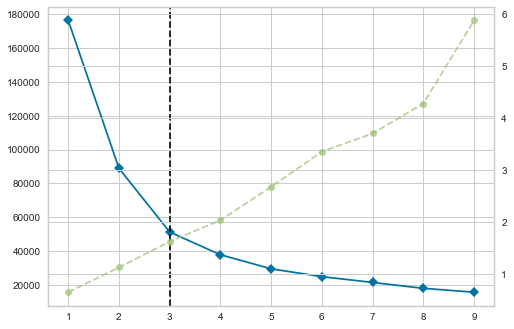

In [24]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(data_scale)

In [32]:
data['cluster'].value_counts()

1    356783
0    247141
2    199384
Name: cluster, dtype: int64

In [45]:
custom.columns.to_list()

['AGE_TCD',
 'MT_EP_EXIST_YN',
 'LST_BEST_EA',
 'LST_BEST_YM',
 'DMST_FST_BUY_YM',
 'DMETF_FST_BUY_YM',
 'OVST_FST_BUY_YM',
 'OVETF_FST_BUY_YM',
 'DMST_FIN_BUY_YM',
 'DMETF_FIN_BUY_YM',
 'OVST_FIN_BUY_YM',
 'OVETF_FIN_BUY_YM',
 'DMST_TR_MONTHS_CNT',
 'DMETF_TR_MONTHS_CNT',
 'OVST_TR_MONTHS_CNT',
 'OVETF_TR_MONTHS_CNT',
 'APY_ITM_CNT',
 'APY_FIN_YM',
 'DAY_TR_RATIO',
 'SWING_TR_RATIO',
 'MONTHS_TR_RATIO',
 'MID_TR_RATIO',
 'HLD_TR_RATIO',
 'YEARS_TR_RATIO',
 'CASH_AST_M1',
 'DMST_AST_EVAL_M1',
 'OVST_AST_EVAL_M1',
 'DMST_AST_PCHS_M1',
 'OVST_AST_PCHS_M1',
 'DMST_ITM_CNT_M1',
 'OVST_ITM_CNT_M1',
 'DMST_AST1_ITM_M1',
 'DMST_AST2_ITM_M1',
 'DMST_AST3_ITM_M1',
 'DMST_AST1_MKT_M1',
 'DMST_AST2_MKT_M1',
 'DMST_AST3_MKT_M1',
 'DMST_AST1_PCHS_M1',
 'DMST_AST2_PCHS_M1',
 'DMST_AST3_PCHS_M1',
 'DMST_AST1_EVAL_M1',
 'DMST_AST2_EVAL_M1',
 'DMST_AST3_EVAL_M1',
 'OVST_AST1_ITM_M1',
 'OVST_AST2_ITM_M1',
 'OVST_AST3_ITM_M1',
 'OVST_AST1_MKT_M1',
 'OVST_AST2_MKT_M1',
 'OVST_AST3_MKT_M1',
 'OVST_AST1_PCH

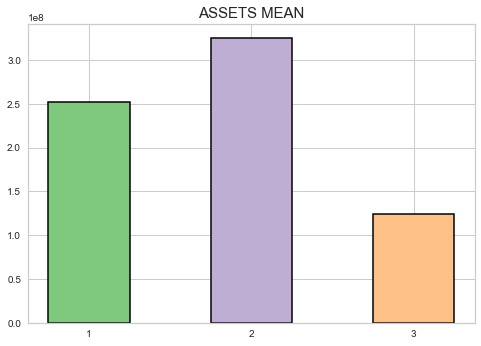

In [38]:
import seaborn as sns

colors = sns.color_palette('Accent',4) # 색상 지정

plt.bar(['1', '2', '3'], 
        custom.groupby('cluster')['ASSETS'].mean(), color = colors, 
        width=0.5, edgecolor = 'black', linewidth = 1.5)
plt.title('ASSETS MEAN', fontsize=15)
plt.show()

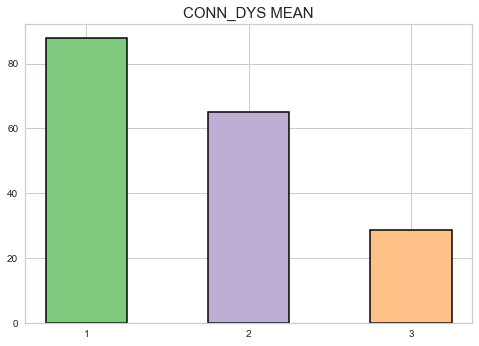

In [42]:
colors = sns.color_palette('Accent',4) # 색상 지정

plt.bar(['1', '2', '3'], 
        custom.groupby('cluster')['CONN_DYS'].mean(), color = colors, 
        width=0.5, edgecolor = 'black', linewidth = 1.5)
plt.title('CONN_DYS MEAN', fontsize=15)
plt.show()

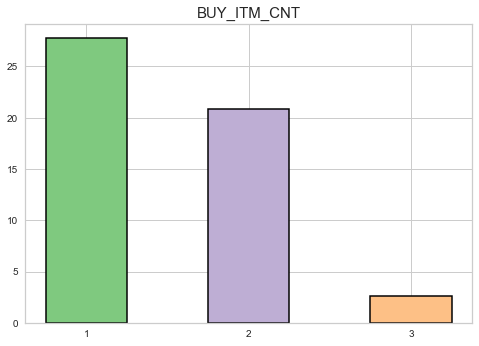

In [48]:
colors = sns.color_palette('Accent',4) # 색상 지정

plt.bar(['1','2','3'], 
        custom.groupby('cluster')['BUY_ITM_CNT'].mean(), color = colors, 
        width=0.5, edgecolor = 'black', linewidth = 1.5)
plt.title('BUY_ITM_CNT', fontsize=15)
plt.show()

In [81]:
df= custom[custom['OVETF_FST_BUY_YM']!=0]
df_eng= df['BUY1_ITM_M1_1'].apply(lambda x: ''.join(filter(str.isalpha, str(x))) if isinstance(x, str) else '')
df_eng.

2             
3         TQQQ
7             
19        TQQQ
25            
          ... 
803265    AMZN
803273        
803287    SOXL
803295        
803299        
Name: BUY1_ITM_M1_1, Length: 109700, dtype: object

In [85]:
df_eng.unique()

array(['', 'TQQQ', 'DIS', 'RBLX', 'NVDA', 'JOBY', 'TLT', 'BOIL', 'IONQ',
       'JEPI', 'BULZ', 'IEFA', 'UVIX', 'BAC', 'SQQQ', 'SOXS', 'TSLA',
       'SOXL', 'VOO', 'FFIE', 'LABU', 'KO', 'LTP', 'MO', 'PDI', 'GOGL',
       'BILI', 'CWEB', 'NRBO', 'TSM', 'CPNG', 'AAPL', 'SCHD', 'MBLY',
       'SPY', 'TMF', 'TSLL', 'CLM', 'SHY', 'NKLA', 'BBBY', 'QQQ', 'QYLD',
       'AR', 'AMZN', 'AGQ', 'GOOGL', 'VZ', 'COIN', 'LCID', 'CRM', 'SBUX',
       'SPLG', 'LICY', 'NU', 'AMAM', 'O', 'AGNC', 'QLD', 'NFLX', 'T',
       'MSFT', 'FTCH', 'NIO', 'IEF', 'RGTI', 'CHPT', 'ABNB', 'U', 'VTI',
       'LTPZ', 'VXX', 'SPYG', 'LIT', 'UPRO', 'META', 'AMT', 'KOLD', 'FXI',
       'TIP', 'BNGO', 'PFE', 'MULN', 'CTIC', 'ARCC', 'JKS', 'YINN',
       'BABA', 'MU', 'ZM', 'VFC', 'PSNY', 'CVNA', 'WEBL', 'NVAX', 'COST',
       'SPXS', 'ASML', 'DDOG', 'YANG', 'SNAP', 'AFRM', 'LMT', 'DNMR',
       'XYLD', 'FNGU', 'TME', 'GOEV', 'USOI', 'SOXX', 'ZIM', 'MAIN',
       'SSO', 'XPEV', 'IAU', 'UDOW', 'CCL', 'TSL', 'UAVS', 'RIG', 'S